<a href="https://colab.research.google.com/github/Imshubhham/Imshubhham/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv('titanic_train.csv')

In [170]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [171]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

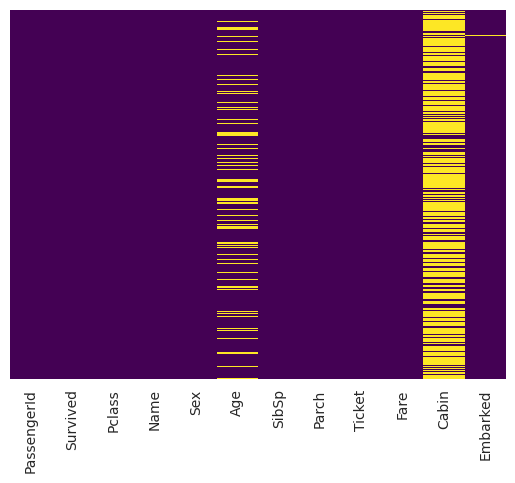

In [174]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [175]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

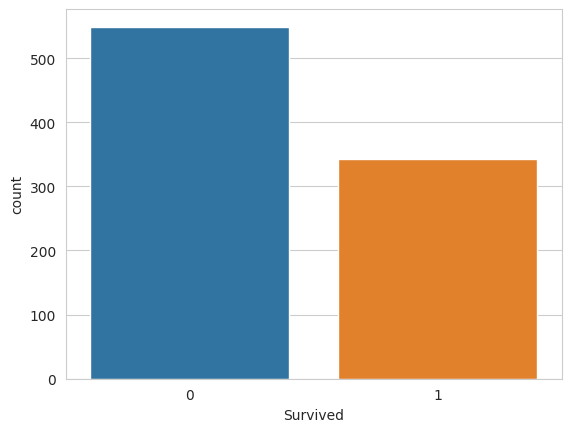

In [176]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

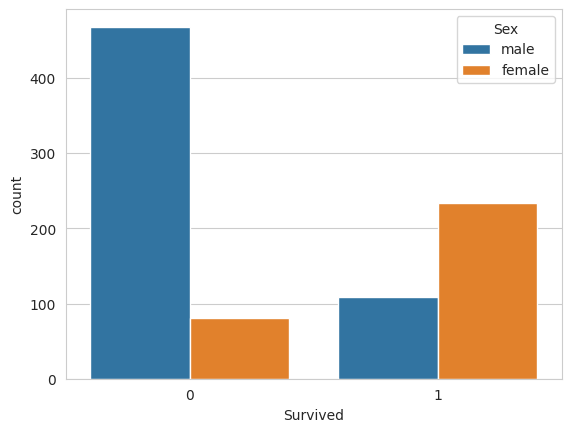

In [177]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

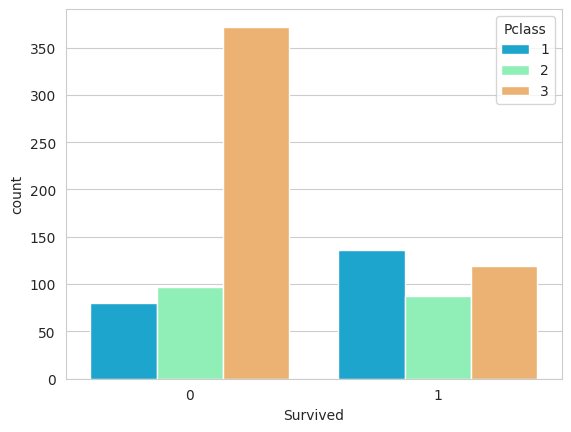

In [178]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<ipython-input-179-2c36abe4c05d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),color='darkred',bins=40)


<Axes: xlabel='Age', ylabel='Density'>

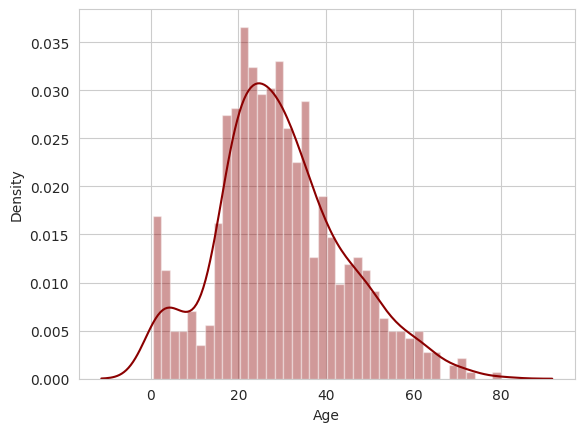

In [179]:
sns.distplot(df['Age'].dropna(),color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

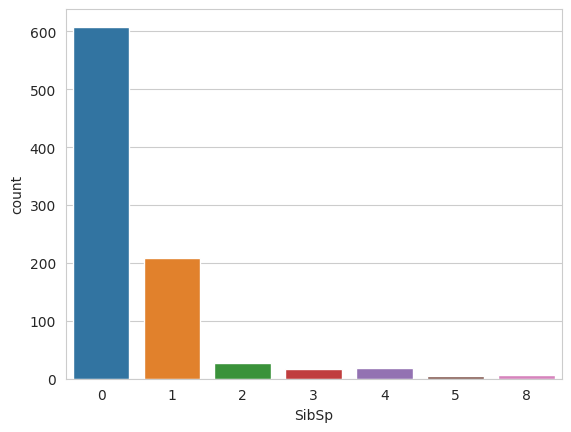

In [180]:
sns.countplot(x='SibSp',data=df)

<Axes: >

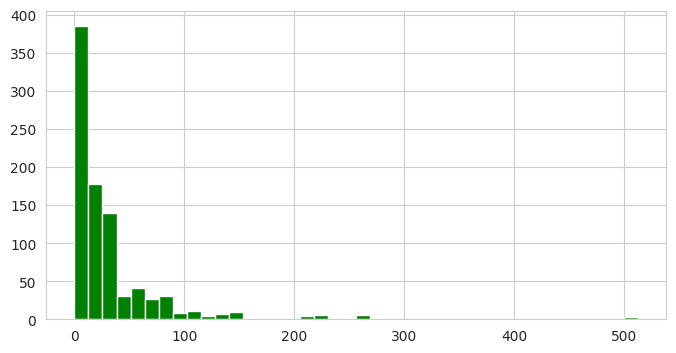

In [181]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

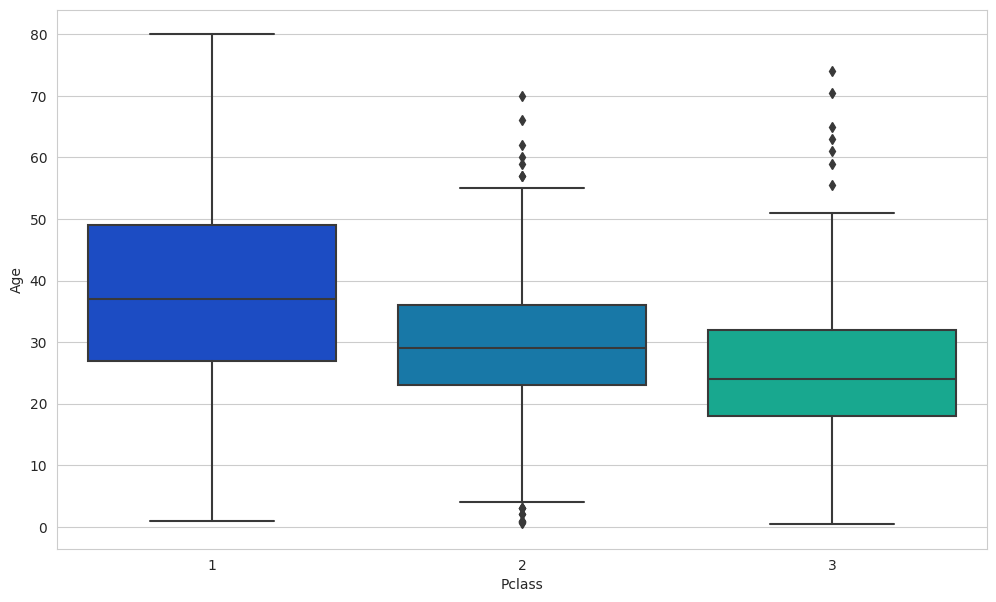

In [182]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [183]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [184]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

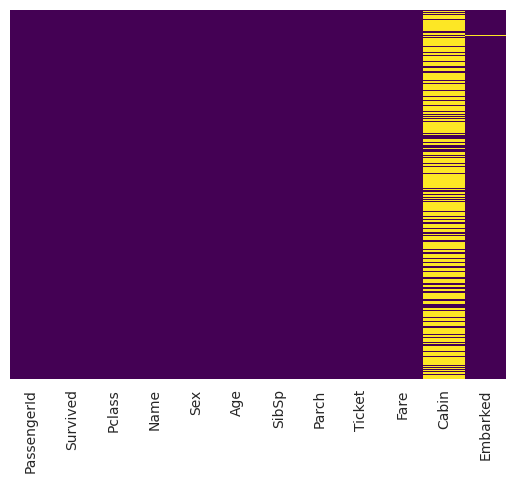

In [185]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #yticklabels used when only x-axis is used.

In [186]:
df.drop('Cabin',axis=1,inplace=True)

<Axes: >

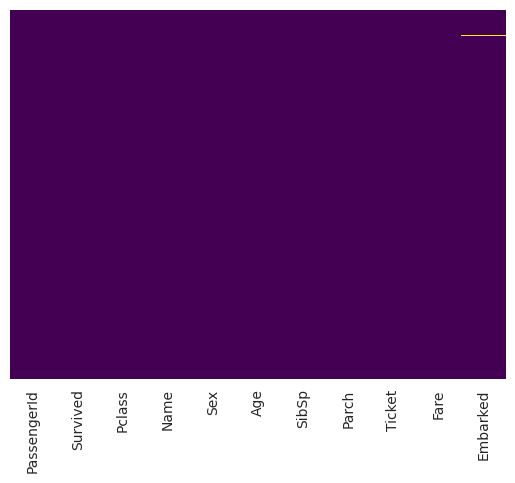

In [187]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [188]:
#from sklearn.preprocessing import OneHotEncoder

In [189]:
#ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [190]:
#df_sex = ohe.fit_transform(df[['Sex'],['Embarked']])

In [191]:
'''df_sex = pd.DataFrame(df_sex)
df_embarked = pd.DataFrame(df_embarked)
df_embarked.sample(10)'''

'df_sex = pd.DataFrame(df_sex)\ndf_embarked = pd.DataFrame(df_embarked)\ndf_embarked.sample(10)'

In [192]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [194]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [195]:
train = pd.concat([df,sex,embark],axis=1)

In [196]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=42)

In [199]:
from sklearn.linear_model import LogisticRegression

In [201]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [212]:
y_pred = lm.predict(X_test)

In [217]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [218]:
accuracy=accuracy_score(y_test,predictions)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)
print("Logistic Accuracy:", int(100*accuracy),"%")
print("Logistic Precision:", precision)
print("Logistic Recall:", recall)
print("Logistic F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

Logistic Accuracy: 78 %
Logistic Precision: 0.7824527175847498
Logistic Recall: 0.7835820895522388
Logistic F1 score: 0.7813818724083353
Confusion Matrix
[[134  23]
 [ 35  76]]


In [219]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

KNN Accuracy: 63 %
KNN Precision: 0.6527075719799174
KNN Recall: 0.6380597014925373
KNN F1 score: 0.5835329621079349
Confusion Matrix
[[145  12]
 [ 85  26]]


In [220]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("DTC Accuracy:", int(100*accuracy),"%")
print("DTC Precision:", precision)
print("DTC Recall:", recall)
print("DTC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

DTC Accuracy: 73 %
DTC Precision: 0.7368773958978277
DTC Recall: 0.7388059701492538
DTC F1 score: 0.737168485083724
Confusion Matrix
[[126  31]
 [ 39  72]]


In [221]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("RFC Accuracy:", int(100*accuracy),"%")
print("RFC Precision:", precision)
print("RFC Recall:", recall)
print("RFC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

RFC Accuracy: 79 %
RFC Precision: 0.8011766226928254
RFC Recall: 0.7985074626865671
RFC F1 score: 0.7940218550106611
Confusion Matrix
[[141  16]
 [ 38  73]]


In [222]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred = g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("GNB Accuracy:", int(100*accuracy),"%")
print("GNB Precision:", precision)
print("GNB Recall:", recall)
print("GNB F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

GNB Accuracy: 79 %
GNB Precision: 0.7945214949418615
GNB Recall: 0.7947761194029851
GNB F1 score: 0.7946375641722436
Confusion Matrix
[[130  27]
 [ 28  83]]


In [223]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("SVM Accuracy:", int(100*accuracy),"%")
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

SVM Accuracy: 60 %
SVM Precision: 0.6280750398206595
SVM Recall: 0.6044776119402985
SVM F1 score: 0.5001074765545097
Confusion Matrix
[[152   5]
 [101  10]]


In this Titanic dataset Random forest and guassian naive bayes is performing well, around 80% accuracy..